#Questions.1

### Matrix Multiplication Operation Counts

Given:
- First matrix: shape \((n, k)\)
- Second matrix: shape \((k, m)\)
- Result: shape \((n, m)\)

For each element in the result:
- **Multiplications:** \( k \)
- **Additions:** \( k - 1 \)

Total for the whole matrix:
- **Multiplications:** \( n x m x k \)
- **Additions:** \( n \times m \times (k - 1) \)
# New Section



##question 2



In [22]:

import time
import numpy as np

# Matrix sizes
n, k, m = 200, 300, 150

# --- Pure Python multiplication ---
A_list = [[1] * k for _ in range(n)]
B_list = [[1] * m for _ in range(k)]

def multiply_lists(A, B):
    return [[sum(A[i][t] * B[t][j] for t in range(len(B)))
             for j in range(len(B[0]))] for i in range(len(A))]

t0 = time.time()
_ = multiply_lists(A_list, B_list)
t1 = time.time()

# --- NumPy multiplication ---
A_np, B_np = np.ones((n, k)), np.ones((k, m))
t2 = time.time()
_ = A_np @ B_np
t3 = time.time()

# --- Results ---
print(f"Python lists: {t1 - t0:.6f} sec")
print(f"NumPy:        {t3 - t2:.6f} sec")
print("NumPy is faster (optimized C/Fortran under the hood)." if t3 - t2 < t1 - t0 else "Python lists were faster (unlikely).")




Python lists: 0.707746 sec
NumPy:        0.001274 sec
NumPy is faster (optimized C/Fortran under the hood).


Question.3

In [23]:
#Questions.3
import time, random, numpy as np

# Data
n = 10_000
arr = [random.randint(0, 100_000) for _ in range(n)]

def naive(lst):
    lst = lst[:]
    for _ in range(len(lst)//2):
        lst.remove(max(lst))
    return max(lst)

def sort_pick(lst):
    s = sorted(lst)
    m = len(s)//2
    return s[m] if len(s)%2 else (s[m-1] + s[m]) / 2

def quicksel(lst, k):
    if len(lst) == 1: return lst[0]
    p = random.choice(lst)
    low = [x for x in lst if x < p]
    high = [x for x in lst if x > p]
    piv = [x for x in lst if x == p]
    if k < len(low): return quicksel(low, k)
    if k < len(low) + len(piv): return piv[0]
    return quicksel(high, k - len(low) - len(piv))

def quick_median(lst):
    n = len(lst)
    return quicksel(lst, n//2) if n%2 else (quicksel(lst, n//2-1) + quicksel(lst, n//2)) / 2

# Compare
methods = {
    "Naive": naive,
    "Sort": sort_pick,
    "Quickselect": quick_median,
    "NumPy": np.median
}

for name, func in methods.items():
    start = time.time()
    median = func(arr)
    print(f"{name:<12} | Median: {median:<10} | Time: {time.time()-start:.6f}s")



Naive        | Median: 50387      | Time: 0.760370s
Sort         | Median: 50395.5    | Time: 0.001542s
Quickselect  | Median: 50395.5    | Time: 0.005968s
NumPy        | Median: 50395.5    | Time: 0.000853s


#Questions.4
## Gradient of \( f(x, y) \)

Given:
\[
f(x, y) = x^2 y + y^3 \sin(x)
\]

**Partial derivative with respect to \(x\):**
\[
\$frac{\partial f}{\partial x} = 2xy + y^3 \cos(x)$
\]

**Partial derivative with respect to \(y\):**
\[
\$frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x)$
\]

**Gradient vector:**
\[
\nabla f(x, y) =
\begin{bmatrix}
2xy + y^3 \cos(x) \\
x^2 + 3y^2 \sin(x)
\end{bmatrix}
\]



Questions.6

In [26]:
#Questions.6
import sympy as sp

x, y = sp.symbols('x y')
f = x**2 + 3*x*y + sp.sin(y)
grad = [sp.diff(f, v) for v in (x, y)]

print("Gradient:", grad)
print("At x=2, y=1:", [g.subs({x: 2, y: 1}) for g in grad])


Gradient: [2*x + 3*y, 3*x + cos(y)]
At x=2, y=1: [7, cos(1) + 6]


Questions.7

In [6]:
#Questions.7
# Nested dictionary for students' marks
students_data = {
    2022: {
        "Branch 1": {
            1: {"Name": "Alice", "Marks": {"Maths": 100, "English": 70}},
            2: {"Name": "Bob", "Marks": {"Maths": 85, "English": 88}}
        },
        "Branch 2": {
            3: {"Name": "Charlie", "Marks": {"Maths": 92, "English": 76}}
        }
    },
    2023: {
        "Branch 1": {},
        "Branch 2": {}
    },
    2024: {
        "Branch 1": {},
        "Branch 2": {}
    },
    2025: {
        "Branch 1": {},
        "Branch 2": {}
    }
}

# Example: Access Alice's Maths marks
print(students_data[2022]["Branch 1"][1]["Marks"]["Maths"])


100


Questions.8

In [27]:
#Questions.8
class Student:
    def __init__(self, roll, name, marks):
        self.roll, self.name, self.marks = roll, name, marks

class Branch:
    def __init__(self, name):
        self.name, self.students = name, []
    def add(self, student): self.students.append(student)

class Year:
    def __init__(self, yr):
        self.yr, self.branches = yr, []
    def add(self, branch): self.branches.append(branch)

# Data
y2022 = Year(2022)
b1, b2 = Branch("Branch 1"), Branch("Branch 2")
b1.add(Student(1, "Alice", {"Maths": 100, "English": 70}))
b1.add(Student(2, "Bob", {"Maths": 85, "English": 88}))
b2.add(Student(3, "Charlie", {"Maths": 92, "English": 76}))
y2022.add(b1); y2022.add(b2)

# Print
for b in y2022.branches:
    print(b.name, [(s.roll, s.name, s.marks) for s in b.students])


Branch 1 [(1, 'Alice', {'Maths': 100, 'English': 70}), (2, 'Bob', {'Maths': 85, 'English': 88})]
Branch 2 [(3, 'Charlie', {'Maths': 92, 'English': 76})]


Questions.9

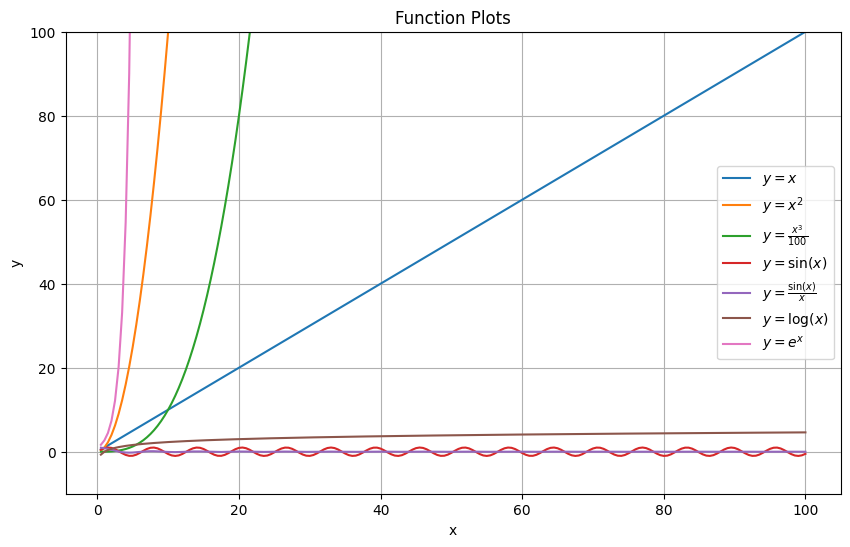

In [8]:
#Questions.9
import numpy as np
import matplotlib.pyplot as plt

# Domain
x = np.arange(0.5, 100.5, 0.5)

# Functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label=r'$y = x$')
plt.plot(x, y2, label=r'$y = x^2$')
plt.plot(x, y3, label=r'$y = \frac{x^3}{100}$')
plt.plot(x, y4, label=r'$y = \sin(x)$')
plt.plot(x, y5, label=r'$y = \frac{\sin(x)}{x}$')
plt.plot(x, y6, label=r'$y = \log(x)$')
plt.plot(x, y7, label=r'$y = e^x$')

# Formatting
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function Plots')
plt.legend()
plt.grid(True)
plt.ylim(-10, 100)  # Limit y-axis to prevent e^x from dominating
plt.show()


Questions.10

In [9]:
#Questions.10
import numpy as np
import pandas as pd

# Step 1: Generate random 20x5 matrix with values from 1 to 2
matrix = np.random.uniform(1, 2, size=(20, 5))

# Step 2: Create DataFrame
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# Step 3: Find column with highest standard deviation
col_highest_std = df.std().idxmax()

# Step 4: Find row with lowest mean
row_lowest_mean_index = df.mean(axis=1).idxmin()

print("Column with highest standard deviation:", col_highest_std)
print("Row with lowest mean (index):", row_lowest_mean_index)


Column with highest standard deviation: c
Row with lowest mean (index): 12


Questions.11

In [28]:
#Questions.11
import pandas as pd

# sample data
df = pd.DataFrame({
    'a': [1, 3, 5, 7],
    'b': [2, 4, 1, 0],
    'c': [0, 1, 2, 3],
    'd': [1, 0, 3, 2],
    'e': [3, 1, 0, 5]
})

# Add column 'f' as sum of columns a to e
df['f'] = df[['a','b','c','d','e']].sum(axis=1)

# Add column 'g': 'LT8' if f < 8 else 'GT8'
df['g'] = ['LT8' if val < 8 else 'GT8' for val in df['f']]

# Count how many rows have g = 'LT8'
count_lt8 = (df['g'] == 'LT8').sum()

# Calculate std deviation of 'f' grouped by 'g'
std_dev = df.groupby('g')['f'].std()

print("Count of LT8 rows:", count_lt8)
print("\nStd deviation by group:")
print(std_dev)

print("\nUpdated DataFrame:")
print(df)



Count of LT8 rows: 1

Std deviation by group:
g
GT8    4.163332
LT8         NaN
Name: f, dtype: float64

Updated DataFrame:
   a  b  c  d  e   f    g
0  1  2  0  1  3   7  LT8
1  3  4  1  0  1   9  GT8
2  5  1  2  3  0  11  GT8
3  7  0  3  2  5  17  GT8


Questions.12

In [11]:
#Questions.12
import numpy as np

# Example arrays
A = np.array([[1, 2, 3],
              [4, 5, 6]])   # Shape: (2, 3)

b = np.array([10, 20, 30])  # Shape: (3,)

# Broadcasting: b is "stretched" to match A's shape
result = A + b

print("Array A:\n", A)
print("\nArray b:\n", b)
print("\nA + b (Broadcasted):\n", result)


Array A:
 [[1 2 3]
 [4 5 6]]

Array b:
 [10 20 30]

A + b (Broadcasted):
 [[11 22 33]
 [14 25 36]]


Questions.13

In [29]:
#Questions.13
import numpy as np

def my_argmin(arr):
    min_idx = 0
    min_val = arr[0]
    for i in range(1, len(arr)):
        if arr[i] < min_val:
            min_val = arr[i]
            min_idx = i
    return min_idx

# Example
arr = np.array([4, 2, 7, 1, 5])
print("Array:", arr)
print("My argmin:", my_argmin(arr))
print("NumPy argmin:", np.argmin(arr))



Array: [4 2 7 1 5]
My argmin: 3
NumPy argmin: 3
